In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import os
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential 
from keras.layers import Activation, Dense, Flatten


# In[2]:


path_train = os.listdir('/kaggle/input/brain-tumor-mri-dataset/Training')
path_test = os.listdir('/kaggle/input/brain-tumor-mri-dataset/Testing')
path_train_str = '/kaggle/input/brain-tumor-mri-dataset/Training'
path_test_str = '/kaggle/input/brain-tumor-mri-dataset/Testing'


# In[3]:


classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
def obtain_data(X,Y,path):
    for i in classes:
        path_new = os.path.join(path,i)
        for j in os.listdir(path_new):
            img = cv2.imread(os.path.join(path_new,j))
            img = cv2.resize(img,(128,128))
            X.append(img)
            Y.append(i)


# In[4]:


X_train = []
Y_train = []
X_test = []
Y_test = []
obtain_data(X_train,Y_train,path_train_str)
obtain_data(X_test,Y_test,path_test_str)


# In[5]:


X_train=np.array(X_train)
Y_train=np.array(Y_train)


# In[6]:


X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
y_train_new = []
for i in Y_train:
    y_train_new.append(classes.index(i))
Y_train = y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)
y_test_new = []
for i in Y_test:
    y_test_new.append(classes.index(i))
Y_test = y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


# Converging Path :
# 
# Layer 1

# In[7]:


inputs = tf.keras.layers.Input((128,128,3))
s = tf.keras.layers.Lambda(lambda x:x/255)(inputs)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(s)
c1 = tf.keras.layers.Dropout(0.2)(c1)
c1 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c1)


# Layer 2

# In[8]:


c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.3)(c2)
c2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c2)


# Layer 3

# In[9]:


c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c3)


# Layer 4

# In[10]:


c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(c4)


# Layer 5

# In[11]:


c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.2)(c5)
c5 = tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c5)


# Expansive Path:
# 
# Layer 1

# In[12]:


u6 = tf.keras.layers.Conv2DTranspose(128,(2,2),strides=(2,2),padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6,c4])
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.3)(c6)
c6 = tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c6)


# Layer 2

# In[13]:


u7 = tf.keras.layers.Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7,c3])
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.3)(c7)
c7 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c7)


# Layer 3

# In[14]:


u8 = tf.keras.layers.Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8,c2])
u8 = tf.keras.layers.Dropout(0.2)(u8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.2)(c8)
c8 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c8)


# Layer 4

# In[15]:


u9 = tf.keras.layers.Conv2DTranspose(16,(2,2),strides=(2,2),padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9,c1])
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.2)(c9)
c9 = tf.keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='he_normal',padding='same')(c9)


# Layer 5

# In[16]:

c10 = tf.keras.layers.Conv2D(4,(1,1),activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.01))(c9)
c10 = tf.keras.layers.Dropout(0.3)(c10)
c10= tf.keras.layers.Flatten()(c10)
c12= tf.keras.layers.Dense(512,kernel_regularizer=tf.keras.regularizers.L2(0.01),activity_regularizer=tf.keras.regularizers.L1(0.01))(c10)
c12 = tf.keras.layers.Dropout(0.2)(c12)
outputs = tf.keras.layers.Dense(4,activation = 'softmax')(c12)


# In[17]:


model = tf.keras.Model(inputs=[inputs],outputs=[outputs])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'], sample_weight_mode='temporal')
model.summary()


# Model Checkpoint

# In[18]:


checkpointer = tf.keras.callbacks.ModelCheckpoint('Brain_tumour_model.h5',verbose=1,save_best_only=True)


# Early Stopping

# In[19]:


callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=50,verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir='logs')]


# In[ ]:


results = model.fit(X_train,Y_train,validation_split=0.2,batch_size=64,epochs=500,callbacks=callbacks)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

2023-07-01 13:43:28.228010: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


72/72 [==============================] - 29s 148ms/step - loss: 7.8708 - accuracy: 0.4732 - val_loss: 2.4941 - val_accuracy: 0.5171
Epoch 2/500
72/72 [==============================] - 8s 112ms/step - loss: 1.9346 - accuracy: 0.6883 - val_loss: 1.8203 - val_accuracy: 0.5871
Epoch 3/500
72/72 [==============================] - 8s 112ms/step - loss: 1.5987 - accuracy: 0.7452 - val_loss: 1.5678 - val_accuracy: 0.7979
Epoch 4/500
72/72 [==============================] - 8s 115ms/step - loss: 1.5312 - accuracy: 0.7708 - val_loss: 1.5187 - val_accuracy: 0.7253
Epoch 5/500
72/72 [==============================] - 8s 116ms/step - loss: 1.4560 - accuracy: 0.8100 - val_loss: 1.4111 - val_accuracy: 0.8005
Epoch 6/500
72/72 [==============================] - 8s 115ms/step - loss: 1.4782 - accuracy: 0.8317 - val_loss: 1.5396 - val_accuracy: 0.7463
Epoch 7/500
72/72 [==============================] - 8s 115ms/step - loss: 1.4426 - accuracy: 0.8306 - val_loss: 1.5283 - val_accuracy: 0.8119
Epoch 8/50

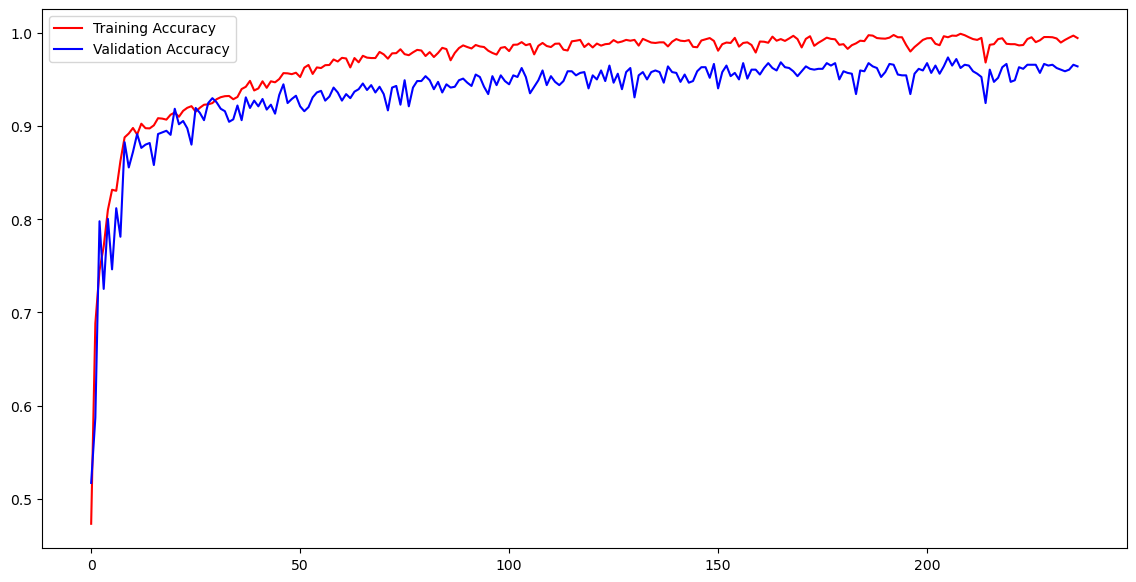

In [2]:
model.save('Brain_tumour_model.h5')
acc = results.history['accuracy']
val_acc = results.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


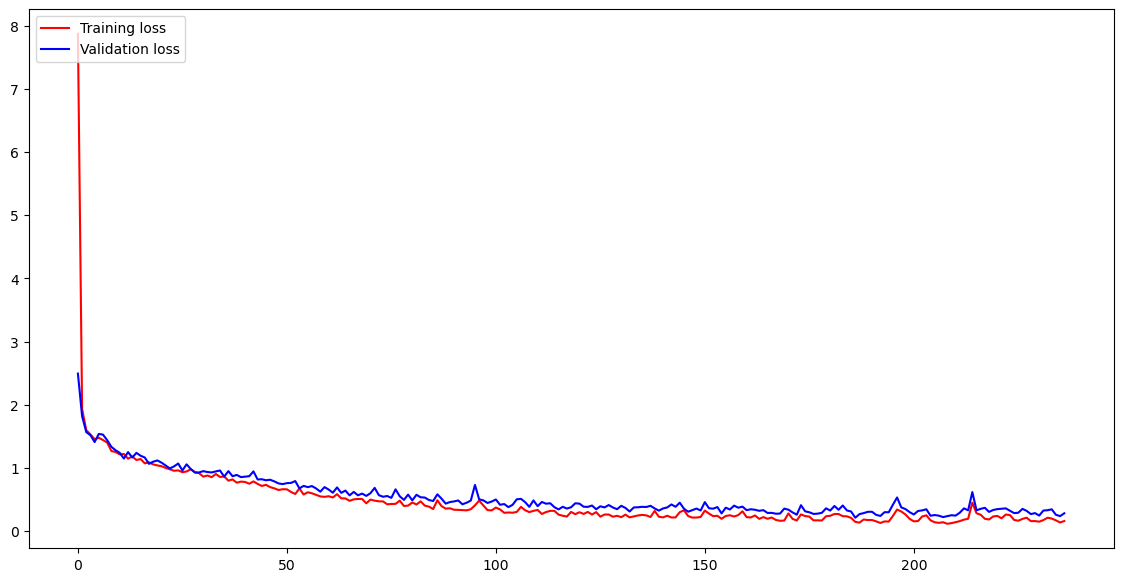

In [3]:
loss = results.history['loss']
val_loss = results.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [4]:
"""
import random
for i in range len(X_test)
    rand_idx = random.randrange(len(X_test))
    img = X_test[rand_idx]
    print(Y_test[rand_idx])
    img = np.array(img)
    img = img.reshape(1,128,128,3)
    img.shape
    prediction = model.predict(img)
    pred_val = prediction.argmax()
    pred_val
    """

'\nimport random\nfor i in range len(X_test)\n    rand_idx = random.randrange(len(X_test))\n    img = X_test[rand_idx]\n    print(Y_test[rand_idx])\n    img = np.array(img)\n    img = img.reshape(1,128,128,3)\n    img.shape\n    prediction = model.predict(img)\n    pred_val = prediction.argmax()\n    pred_val\n    '

In [5]:
def pred_name(n):
    print(classes[n])

In [6]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
print(X_test.shape)
score = model.evaluate(X_test, Y_test, verbose = 1) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

(1311, 128, 128, 3)
41/41 [==============================] - 1s 22ms/step - loss: 0.2760 - accuracy: 0.9664
Test loss: 0.2759697139263153
Test accuracy: 0.966437816619873


In [7]:
realimg = '/kaggle/input/realimg2/PituitaryAdenoma.jpg'
img = cv2.imread(realimg)
img = cv2.resize(img,(128,128))
img =  np.array(img)
img = img.reshape(1,128,128,3)
prediction = model.predict(img)
pred_val = prediction.argmax()
n = pred_val.item()
type(n)
pred_name(n)

1/1 [==============================] - 1s 521ms/step
notumor
